# Worst Case

## Inputs

### Imports

In [8]:
import os
import pandas as pd
import numpy as np

In [9]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [10]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [11]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [12]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [13]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [14]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [15]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7725     0.2040       0.3359    
10       0.4065     0.9786       0.9766    
20       0.1636     0.9720       0.9720    
30       0.0835     0.9762       0.9764    
40       0.0624     0.9790       0.9790    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [16]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-76    9.0   57     0.63   0        Ruim     1.00      
-73    9.4   83     0.97   0        Ruim     1.00      
-85    9.2   91     0.91   0        Ruim     1.00      
-80    4.7   94     0.93   0        Ruim     1.00      
-80    5.6   74     0.83   0        Ruim     1.00      
-73    4.1   80     0.80   0        Ruim     1.00      
-89    7.5   79     0.52   0        Ruim     1.00      
-94    8.4   95     0.83   0        Ruim     1.00      
-68    5.4   37     0.96   0        Ruim     1.00      
-72    4.6   63     0.30   0        Ruim     0.98      
-76    9.2   63     0.32   0        Ruim     1.00      
-82    5.4   82     0.53   0        Ruim     1.00      
-65    6.4   80     0.41   0        Ruim     1.00      
-84    8.3   83     0.65   0        Ruim     1.00      
-94    8.8   83     0.85   0        Ruim     1.00      
-88    5.7   79     0.62   0        Ruim     1.0

## Fusion

In [17]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-76    9.0   57     0.63   0.52   0.52   0.58   0        Ruim     0.68      
-73    9.4   83     0.97   0.61   0.69   0.59   0        Ruim     0.61      
-85    9.2   91     0.91   0.48   0.51   0.48   0        Ruim     0.71      
-80    4.7   94     0.93   0.55   0.53   0.65   0        Ruim     0.66      
-80    5.6   74     0.83   0.51   0.60   0.61   0        Ruim     0.66      
-73    4.1   80     0.80   0.47   0.68   0.51   0        Ruim     0.66      
-89    7.5   79     0.52   0.50   0.68   0.48   0        Ruim     0.66      
-94    8.4   95     0.83   0.57   0.55   0.57   0        Ruim     0.66      
-68    5.4   37     0.96   0.63   0.68   0.57   0        Ruim     0.62      
-72    4.6   63     0.30   0.63   0.62   0.47   0        Ruim     0.63      
-76    9.2   63     0.32   0.46   0.60   0.45   0        Ruim     0.69      
-82  

## Kalman

In [18]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-76    9.0   57     0.63   0.52   0.52   0.58   0        Ruim     0.68      
-73    9.4   83     0.97   0.61   0.69   0.59   0        Ruim     0.62      
-85    9.2   91     0.91   0.48   0.51   0.48   0        Ruim     0.66      
-80    4.7   94     0.93   0.55   0.53   0.65   0        Ruim     0.66      
-80    5.6   74     0.83   0.51   0.60   0.61   0        Ruim     0.66      
-73    4.1   80     0.80   0.47   0.68   0.51   0        Ruim     0.66      
-89    7.5   79     0.52   0.50   0.68   0.48   0        Ruim     0.66      
-94    8.4   95     0.83   0.57   0.55   0.57   0        Ruim     0.66      
-68    5.4   37     0.96   0.63   0.68   0.57   0        Ruim     0.65      
-72    4.6   63     0.30   0.63   0.62   0.47   0        Ruim     0.65      
-76    9.2   63     0.32   0.46   0.60   0.45   0        Ruim     0.66      


## Results

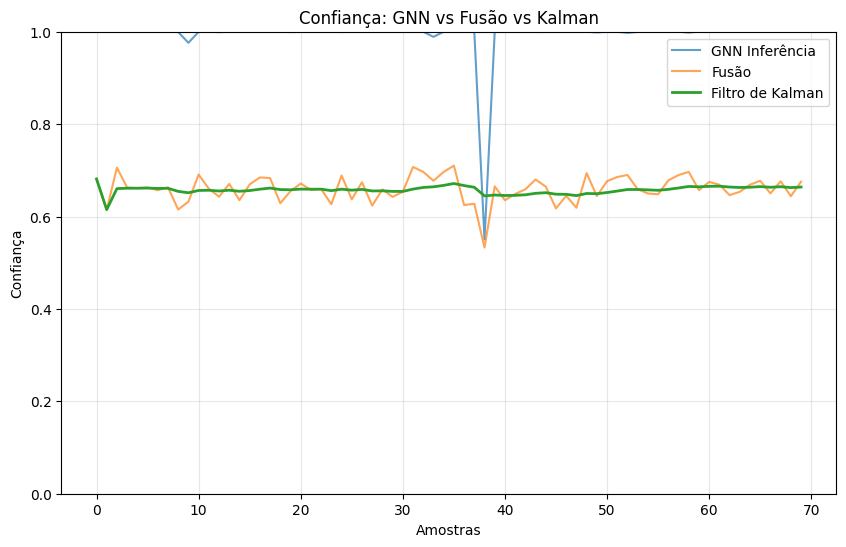

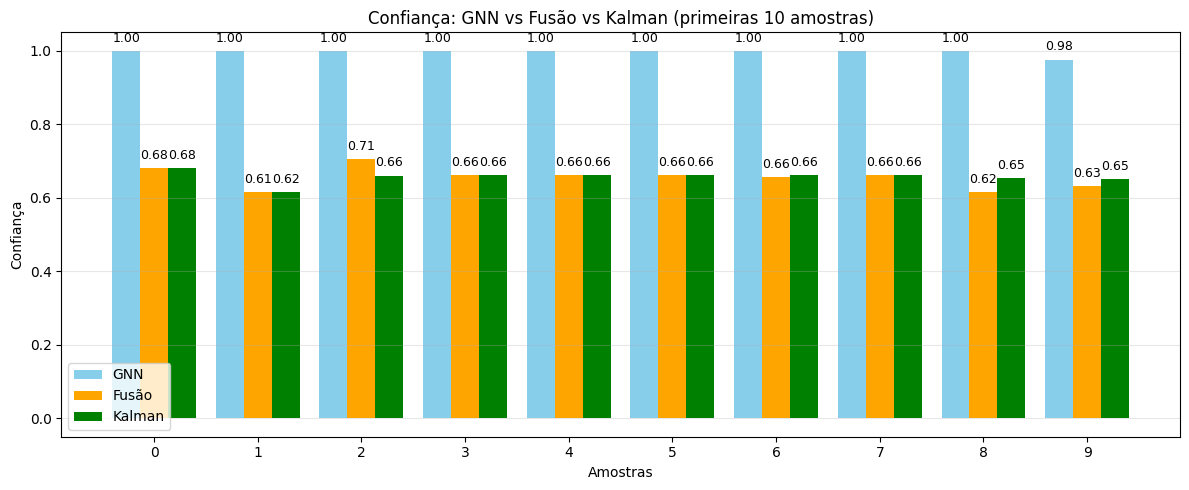

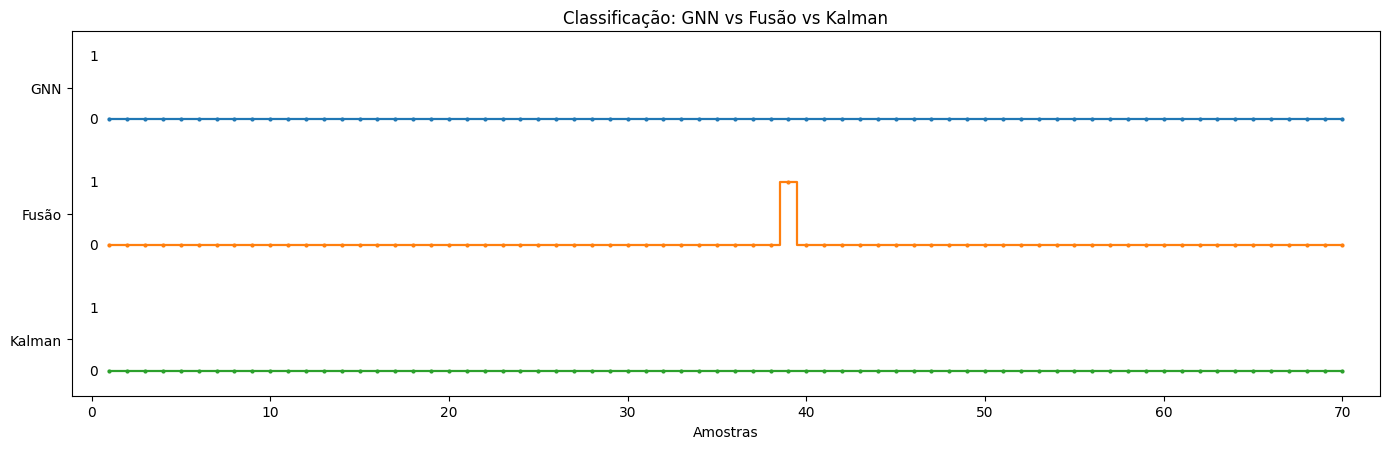

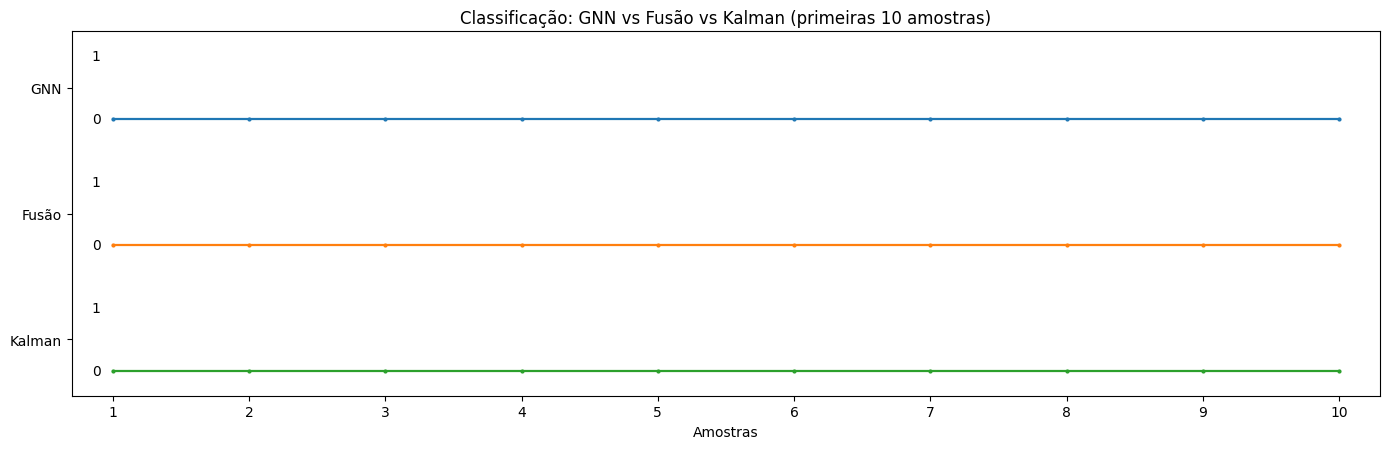

In [19]:
%run 7.results.ipynb

# Best Case

## Inputs

### Imports

In [20]:
import os
import pandas as pd
import numpy as np

### Parameters

In [21]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [22]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [23]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [24]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [25]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [26]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [27]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6413     0.4873       0.5040    
10       0.2953     0.9829       0.9826    
20       0.1099     0.9808       0.9797    
30       0.0632     0.9797       0.9786    
40       0.0527     0.9806       0.9800    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [28]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-42    4.0   11     0.36   1        Bom      0.99      
-47    3.1   2      0.22   1        Bom      1.00      
-41    1.5   6      0.03   1        Bom      1.00      
-57    2.0   13     0.28   1        Bom      0.99      
-46    1.2   25     0.04   1        Bom      1.00      
-44    3.5   7      0.11   1        Bom      1.00      
-32    1.2   12     0.04   1        Bom      1.00      
-48    1.4   17     0.10   1        Bom      1.00      
-62    1.7   12     0.00   1        Bom      1.00      
-54    1.4   10     0.03   1        Bom      1.00      
-43    2.5   5      0.05   1        Bom      1.00      
-33    3.2   7      0.23   1        Bom      1.00      
-57    1.2   34     0.27   1        Bom      0.99      
-48    2.9   11     0.35   1        Bom      0.99      
-40    2.7   22     0.06   1        Bom      1.00      
-37    3.7   35     0.00   1        Bom      1.0

## Fusion

In [29]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-42    4.0   11     0.36   0.85   0.85   0.72   1        Bom      0.89      
-47    3.1   2      0.22   0.80   0.89   0.86   1        Bom      0.91      
-41    1.5   6      0.03   0.92   0.81   0.71   1        Bom      0.90      
-57    2.0   13     0.28   0.89   0.81   0.72   1        Bom      0.89      
-46    1.2   25     0.04   0.92   0.87   0.88   1        Bom      0.94      
-44    3.5   7      0.11   0.80   0.88   0.87   1        Bom      0.91      
-32    1.2   12     0.04   0.88   0.90   0.88   1        Bom      0.93      
-48    1.4   17     0.10   0.78   0.94   0.81   1        Bom      0.91      
-62    1.7   12     0.00   0.94   0.93   0.78   1        Bom      0.94      
-54    1.4   10     0.03   0.91   0.84   0.88   1        Bom      0.93      
-43    2.5   5      0.05   0.78   0.90   0.80   1        Bom      0.90      
-33  

## Kalman

In [30]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-42    4.0   11     0.36   0.85   0.85   0.72   1        Bom      0.89      
-47    3.1   2      0.22   0.80   0.89   0.86   1        Bom      0.91      
-41    1.5   6      0.03   0.92   0.81   0.71   1        Bom      0.91      
-57    2.0   13     0.28   0.89   0.81   0.72   1        Bom      0.90      
-46    1.2   25     0.04   0.92   0.87   0.88   1        Bom      0.91      
-44    3.5   7      0.11   0.80   0.88   0.87   1        Bom      0.91      
-32    1.2   12     0.04   0.88   0.90   0.88   1        Bom      0.91      
-48    1.4   17     0.10   0.78   0.94   0.81   1        Bom      0.91      
-62    1.7   12     0.00   0.94   0.93   0.78   1        Bom      0.92      
-54    1.4   10     0.03   0.91   0.84   0.88   1        Bom      0.92      
-43    2.5   5      0.05   0.78   0.90   0.80   1        Bom      0.92      


## Resuts

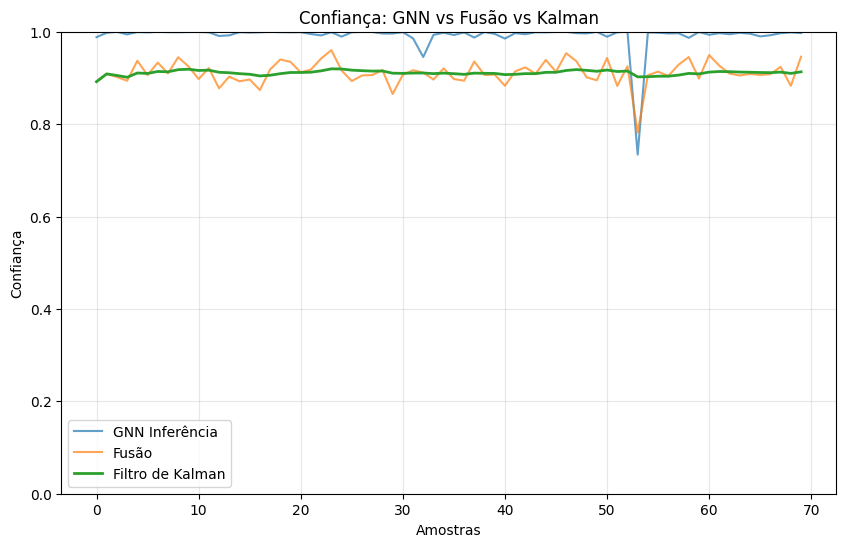

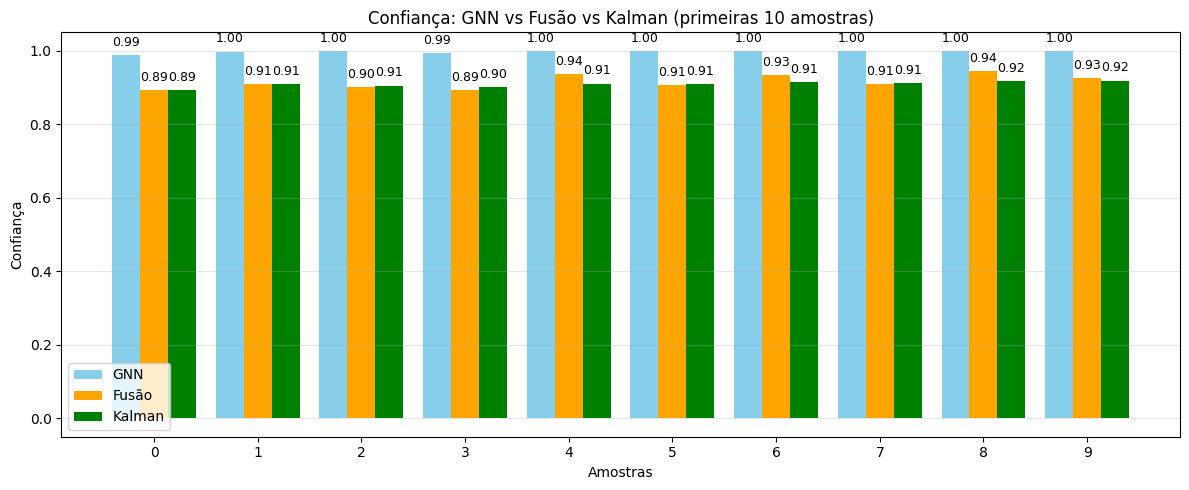

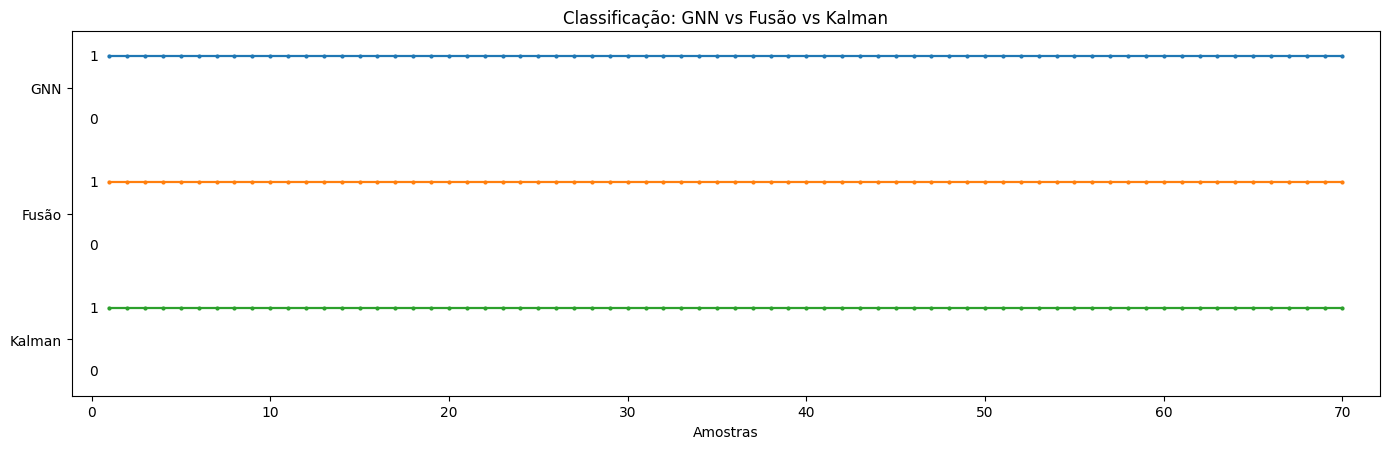

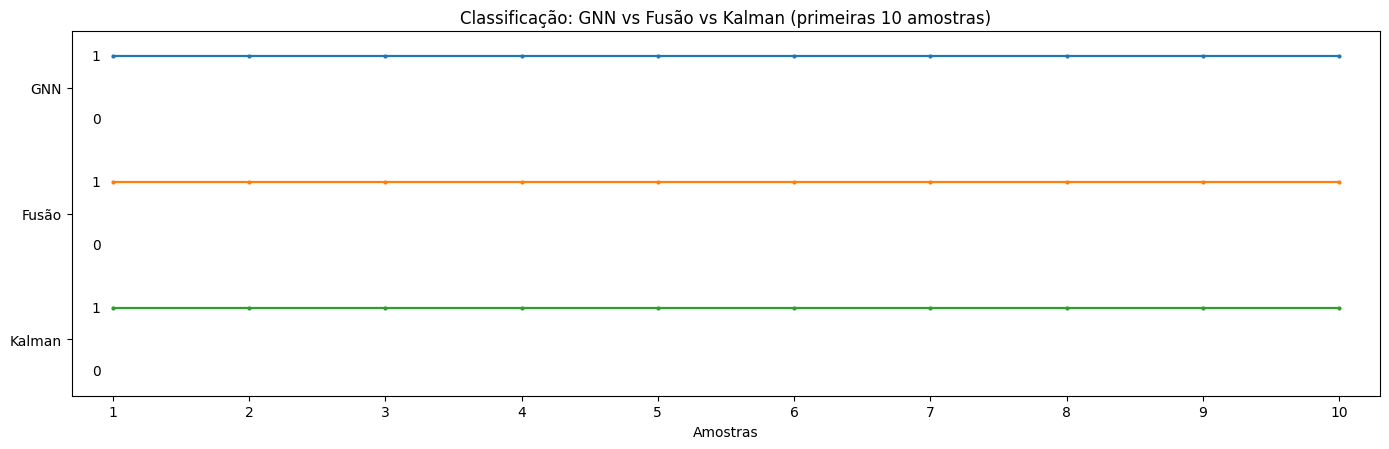

In [31]:
%run 7.results.ipynb